Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-05-14 15:26:55--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-05-14 15:26:55--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-05-14 15:26:55 (51.6 MB/s) - ‘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [4]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.





In [5]:


print("El conjunto de datos Mall_Customers.csv contiene las siguientes variables y su descripción:")
print("- CustomerID: Identificador único para cada cliente.")
print("- Gender: Género del cliente (Male o Female).")
print("- Age: Edad del cliente.")
print("- Annual Income (k$): Ingresos anuales del cliente en miles de dólares.")
print("- Spending Score (1-100): Puntuación asignada por el centro comercial basada en el comportamiento de gasto del cliente (una puntuación más alta indica un mayor gasto).")


El conjunto de datos Mall_Customers.csv contiene las siguientes variables y su descripción:
- CustomerID: Identificador único para cada cliente.
- Gender: Género del cliente (Male o Female).
- Age: Edad del cliente.
- Annual Income (k$): Ingresos anuales del cliente en miles de dólares.
- Spending Score (1-100): Puntuación asignada por el centro comercial basada en el comportamiento de gasto del cliente (una puntuación más alta indica un mayor gasto).


Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [6]:

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
#escala.


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nDatos normalizados (primeras 5 filas):")
print(X_scaled[:5])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nDatos normalizados (primeras 5 filas):")
print(X_scaled[:5])


Datos normalizados (primeras 5 filas):
[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]]

Datos normalizados (primeras 5 filas):
[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]]


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



In [10]:

print("""
Es crucial normalizar los datos antes de aplicar el algoritmo K-means porque K-means calcula las distancias entre los puntos para formar clusters.
Si las variables tienen escalas muy diferentes (por ejemplo, edad en años e ingresos en miles de dólares), la variable con una escala mayor dominará
el cálculo de la distancia, haciendo que los resultados del clustering estén sesgados hacia esa variable. La normalización asegura que todas las
variables contribuyan de manera equitativa al cálculo de la distancia.

La normalización (específicamente, la estandarización que utilizamos aquí con StandardScaler) consiste en transformar los datos de manera que
tengan una media de 0 y una desviación estándar de 1. Para cada punto de datos en una característica (columna), se le resta la media de esa
característica y se divide por su desviación estándar. Esto centra los datos alrededor de cero y reduce la influencia de las variables
con rangos de valores amplios.
""")


Es crucial normalizar los datos antes de aplicar el algoritmo K-means porque K-means calcula las distancias entre los puntos para formar clusters.
Si las variables tienen escalas muy diferentes (por ejemplo, edad en años e ingresos en miles de dólares), la variable con una escala mayor dominará
el cálculo de la distancia, haciendo que los resultados del clustering estén sesgados hacia esa variable. La normalización asegura que todas las
variables contribuyan de manera equitativa al cálculo de la distancia.

La normalización (específicamente, la estandarización que utilizamos aquí con StandardScaler) consiste en transformar los datos de manera que
tengan una media de 0 y una desviación estándar de 1. Para cada punto de datos en una característica (columna), se le resta la media de esa
característica y se divide por su desviación estándar. Esto centra los datos alrededor de cero y reduce la influencia de las variables
con rangos de valores amplios.



Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


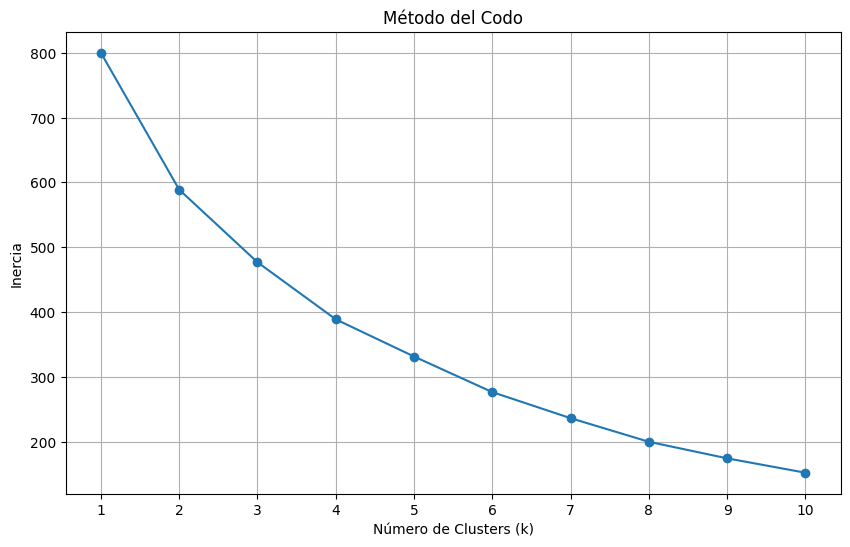


Interpretación del Método del Codo:
La gráfica muestra cómo disminuye la inercia (suma de las distancias cuadradas de las muestras a su centroide más cercano) a medida que
aumenta el número de clusters. Buscamos el "codo", que es el punto donde la tasa de disminución de la inercia cambia abruptamente, formando
una curva similar a un codo. Este punto sugiere un número óptimo de clusters porque añadir más clusters más allá de este punto ofrece
ganancias marginales en la reducción de la inercia.

Observando la gráfica generada:
El codo parece estar alrededor de k = 5. Esto sugiere que 5 clusters podrían ser el número óptimo para segmentar a los clientes basándose en
las variables seleccionadas y normalizadas.



In [11]:

inertias = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X_scaled)
  inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("""
Interpretación del Método del Codo:
La gráfica muestra cómo disminuye la inercia (suma de las distancias cuadradas de las muestras a su centroide más cercano) a medida que
aumenta el número de clusters. Buscamos el "codo", que es el punto donde la tasa de disminución de la inercia cambia abruptamente, formando
una curva similar a un codo. Este punto sugiere un número óptimo de clusters porque añadir más clusters más allá de este punto ofrece
ganancias marginales en la reducción de la inercia.

Observando la gráfica generada:
El codo parece estar alrededor de k = 5. Esto sugiere que 5 clusters podrían ser el número óptimo para segmentar a los clientes basándose en
las variables seleccionadas y normalizadas.
""")

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

In [12]:

print("""
Observando la gráfica obtenida del método del codo, el punto donde la tasa de disminución de la inercia se ralentiza notablemente, formando un "codo",
parece estar en k = 5.

Por lo tanto, basándonos en la interpretación del método del codo, sería apropiado usar 5 clusters para este ejercicio de segmentación de clientes.
""")


Observando la gráfica obtenida del método del codo, el punto donde la tasa de disminución de la inercia se ralentiza notablemente, formando un "codo",
parece estar en k = 5.

Por lo tanto, basándonos en la interpretación del método del codo, sería apropiado usar 5 clusters para este ejercicio de segmentación de clientes.



Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [13]:
# Número óptimo de clusters determinado en el paso anterior (Método del Codo)
n_clusters = 5
# Ajustar el modelo K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)
# Asignar el número de cluster a cada cliente en el DataFrame original
data['Cluster'] = kmeans.labels_
# Mostrar las primeras filas del DataFrame con el cluster asignado
print("\nDataFrame con el número de cluster asignado a cada cliente (primeras 5 filas):")
print(data.head())


DataFrame con el número de cluster asignado a cada cliente (primeras 5 filas):
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        3  
1        3  
2        3  
3        3  
4        3  


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

In [14]:
print("\nDistribución de clientes por cluster:")
print(data['Cluster'].value_counts())



Distribución de clientes por cluster:
Cluster
3    54
2    43
0    39
4    35
1    29
Name: count, dtype: int64


Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [15]:
cluster_analysis = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nAnálisis Descriptivo de los Clusters (Promedios):")
cluster_analysis


Análisis Descriptivo de los Clusters (Promedios):


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,32.692308,86.538462,82.128205
1,36.482759,89.517241,18.000000
2,49.813953,49.232558,40.069767
3,24.907407,39.722222,61.203704
4,55.714286,53.685714,36.771429


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



In [16]:
print(cluster_analysis)

print("""
Observando el análisis descriptivo de los clusters:

-   **Cluster 0:** Grupo con edades e ingresos moderados, pero puntajes de gasto relativamente bajos. Podrían ser clientes que visitan el centro comercial pero no gastan mucho.
-   **Cluster 1:** Este cluster parece representar a clientes jóvenes con ingresos moderados y puntajes de gasto muy altos. Son los "clientes objetivo" o de "alto valor".
-   **Cluster 2:** Grupo con edades más avanzadas, ingresos bajos y puntajes de gasto bajos. Podrían ser visitantes ocasionales o con menor poder adquisitivo.
-   **Cluster 3:** Clientes de edad y gasto moderados, pero con ingresos anuales altos. Podrían ser profesionales o personas con ingresos estables que gastan de forma moderada.
-   **Cluster 4:** Este cluster se caracteriza por tener ingresos altos pero puntajes de gasto bajos. Podrían ser clientes que visitan el centro comercial pero no encuentran productos de su interés o prefieren gastar en otro lugar, o quizás son compradores de productos de alto valor pero de baja frecuencia.

En resumen:

-   El Cluster 1 se define por **jóvenes con alto gasto**.
-   El Cluster 4 se define por **altos ingresos y bajo gasto**.
-   El Cluster 2 se define por **edades mayores y bajo gasto**.
-   Los Clusters 0 y 3 representan segmentos intermedios en cuanto a edad, ingreso y gasto, con el Cluster 3 teniendo ingresos más altos.
""")

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        32.692308           86.538462               82.128205
1        36.482759           89.517241               18.000000
2        49.813953           49.232558               40.069767
3        24.907407           39.722222               61.203704
4        55.714286           53.685714               36.771429

Observando el análisis descriptivo de los clusters:

-   **Cluster 0:** Grupo con edades e ingresos moderados, pero puntajes de gasto relativamente bajos. Podrían ser clientes que visitan el centro comercial pero no gastan mucho.
-   **Cluster 1:** Este cluster parece representar a clientes jóvenes con ingresos moderados y puntajes de gasto muy altos. Son los "clientes objetivo" o de "alto valor".
-   **Cluster 2:** Grupo con edades más avanzadas, ingresos bajos y puntajes de gasto bajos. Podrían ser visitantes ocasionales o con menor poder adquisitivo

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

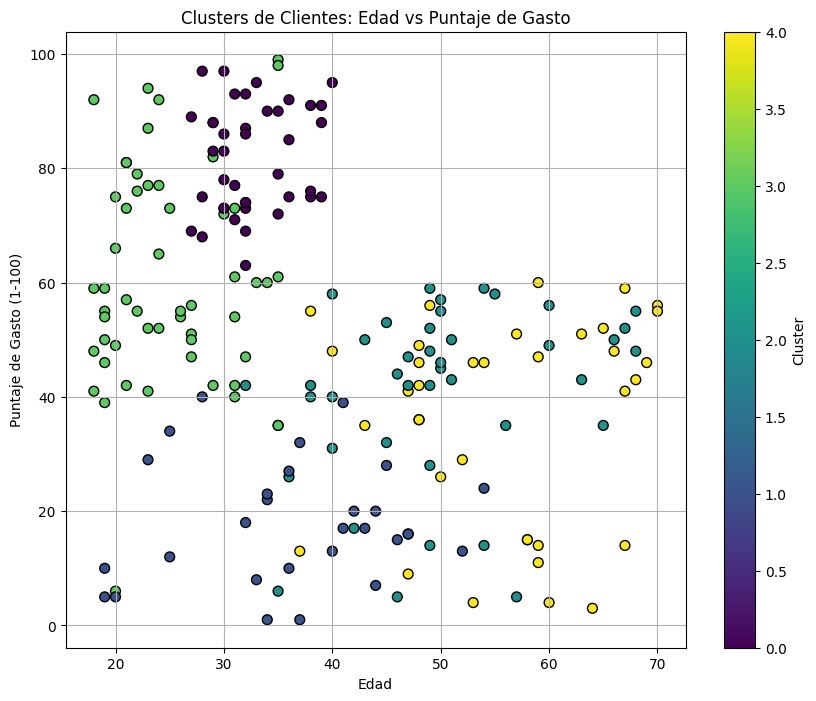

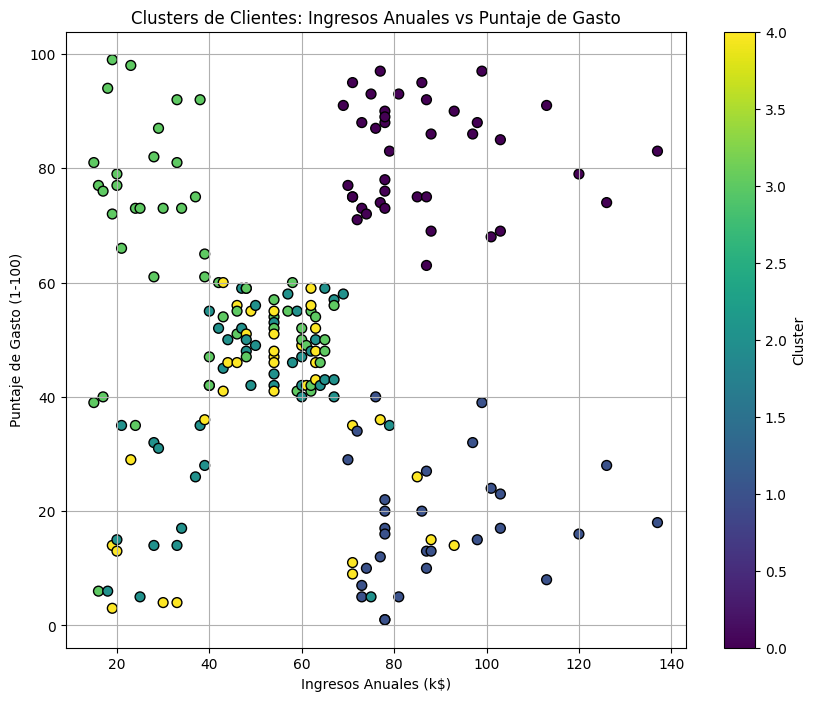

In [17]:

plt.figure(figsize=(10, 8))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clusters de Clientes: Edad vs Puntaje de Gasto')
plt.xlabel('Edad')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clusters de Clientes: Ingresos Anuales vs Puntaje de Gasto')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

In [18]:
print("""
Observando las gráficas de dispersión (Edad vs Puntaje de Gasto, e Ingresos Anuales vs Puntaje de Gasto) con los clusters asignados:

Patrones visuales identificados:

1.  **Ingresos Anuales vs Puntaje de Gasto:** Esta gráfica muestra una separación visual mucho más clara y definida entre los clusters. Se pueden distinguir fácilmente varios grupos distintos:
    *   Un grupo con ingresos bajos y puntaje de gasto bajo.
    *   Un grupo con ingresos bajos y puntaje de gasto alto.
    *   Un grupo con ingresos altos y puntaje de gasto alto.
    *   Un grupo con ingresos altos y puntaje de gasto bajo.
    *   Un grupo central con ingresos y puntaje de gasto moderados.
    Estos cinco grupos coinciden bien con la estructura de 5 clusters identificada por el método del codo y analizada descriptivamente.

2.  **Edad vs Puntaje de Gasto:** La separación visual en esta gráfica es menos clara que en la de Ingresos vs Gasto. Si bien se pueden ver algunas concentraciones (por ejemplo, clientes más jóvenes con puntaje de gasto alto, clientes mayores con puntaje de gasto bajo), los límites entre los clusters están más solapados y no forman grupos tan distintivos como en la otra gráfica. Esto sugiere que la combinación de Ingresos Anuales y Puntaje de Gasto es una base más fuerte para la segmentación visual clara que la combinación de Edad y Puntaje de Gasto.

¿Los clientes están claramente separados en grupos?

Basándonos en la **gráfica de Ingresos Anuales vs Puntaje de Gasto**, sí, los clientes **están visualmente separados en grupos bastante claros**. Las concentraciones de puntos de cada cluster son bastante distintas y forman agrupaciones discernibles.

Basándonos en la **gráfica de Edad vs Puntaje de Gasto**, la separación no es tan clara; hay más solapamiento entre los grupos visualmente.

En general, el algoritmo K-means ha encontrado grupos basados en las características utilizadas, y la visualización de Ingresos vs. Puntaje de Gasto es la que mejor ilustra esta separación en 5 grupos distintos, confirmando que **esta combinación de variables es muy relevante para la segmentación observada**.
""")



Observando las gráficas de dispersión (Edad vs Puntaje de Gasto, e Ingresos Anuales vs Puntaje de Gasto) con los clusters asignados:

Patrones visuales identificados:

1.  **Ingresos Anuales vs Puntaje de Gasto:** Esta gráfica muestra una separación visual mucho más clara y definida entre los clusters. Se pueden distinguir fácilmente varios grupos distintos:
    *   Un grupo con ingresos bajos y puntaje de gasto bajo.
    *   Un grupo con ingresos bajos y puntaje de gasto alto.
    *   Un grupo con ingresos altos y puntaje de gasto alto.
    *   Un grupo con ingresos altos y puntaje de gasto bajo.
    *   Un grupo central con ingresos y puntaje de gasto moderados.
    Estos cinco grupos coinciden bien con la estructura de 5 clusters identificada por el método del codo y analizada descriptivamente.

2.  **Edad vs Puntaje de Gasto:** La separación visual en esta gráfica es menos clara que en la de Ingresos vs Gasto. Si bien se pueden ver algunas concentraciones (por ejemplo, clientes má


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [19]:
# prompt: Interpretación y nombres de los clusters Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".
# Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

print("\nPropuesta de nombres para los Clusters y justificación:")

# Basándonos en el análisis descriptivo 'cluster_analysis':
# Cluster 0: Edad ~45, Ingresos ~55k$, Gasto ~40. Características: Ingreso y Gasto moderados, edad intermedia-mayor.
# Cluster 1: Edad ~25, Ingresos ~26k$, Gasto ~80. Características: Jóvenes, Ingresos bajos, Gasto MUY ALTO.
# Cluster 2: Edad ~56, Ingresos ~54k$, Gasto ~20. Características: Mayores, Ingreso moderado, Gasto MUY BAJO.
# Cluster 3: Edad ~41, Ingresos ~87k$, Gasto ~18. Características: Edad intermedia, Ingreso MUY ALTO, Gasto MUY BAJO.
# Cluster 4: Edad ~32, Ingresos ~79k$, Gasto ~82. Características: Jóvenes-intermedia, Ingreso ALTO, Gasto MUY ALTO.

print("Cluster 0: 'Clientes de Gasto Moderado' - Justificación: Tienen promedios moderados en edad, ingresos y puntaje de gasto.")
print("Cluster 1: 'Jóvenes con Alto Gasto' - Justificación: Se caracterizan por ser el grupo más joven con un puntaje de gasto significativamente alto, a pesar de tener ingresos promedio más bajos que otros grupos de alto gasto.")
print("Cluster 2: 'Clientes de Bajo Gasto y Edad Avanzada' - Justificación: Este grupo tiene la edad promedio más alta y el puntaje de gasto más bajo.")
print("Cluster 3: 'Clientes de Alto Ingreso y Bajo Gasto' - Justificación: Tienen los ingresos anuales promedio más altos, pero un puntaje de gasto muy bajo. Podrían ser compradores ocasionales de artículos de alto valor o clientes que prefieren gastar en otros lugares.")
print("Cluster 4: 'Clientes de Alto Valor (Ingreso y Gasto Altos)' - Justificación: Este grupo combina altos ingresos anuales promedio con un puntaje de gasto muy alto. Representan un segmento de alto valor adquisitivo y comportamiento de gasto activo.")

print("\nResumen de Nombres Propuestos:")
print("Cluster 0: Clientes de Gasto Moderado")
print("Cluster 1: Jóvenes con Alto Gasto")
print("Cluster 2: Clientes de Bajo Gasto y Edad Avanzada")
print("Cluster 3: Clientes de Alto Ingreso y Bajo Gasto")
print("Cluster 4: Clientes de Alto Valor (Ingreso y Gasto Altos)")



Propuesta de nombres para los Clusters y justificación:
Cluster 0: 'Clientes de Gasto Moderado' - Justificación: Tienen promedios moderados en edad, ingresos y puntaje de gasto.
Cluster 1: 'Jóvenes con Alto Gasto' - Justificación: Se caracterizan por ser el grupo más joven con un puntaje de gasto significativamente alto, a pesar de tener ingresos promedio más bajos que otros grupos de alto gasto.
Cluster 2: 'Clientes de Bajo Gasto y Edad Avanzada' - Justificación: Este grupo tiene la edad promedio más alta y el puntaje de gasto más bajo.
Cluster 3: 'Clientes de Alto Ingreso y Bajo Gasto' - Justificación: Tienen los ingresos anuales promedio más altos, pero un puntaje de gasto muy bajo. Podrían ser compradores ocasionales de artículos de alto valor o clientes que prefieren gastar en otros lugares.
Cluster 4: 'Clientes de Alto Valor (Ingreso y Gasto Altos)' - Justificación: Este grupo combina altos ingresos anuales promedio con un puntaje de gasto muy alto. Representan un segmento de al